## PCA vs LDA: What's the Difference?
Both PCA and LDA are linear transformation techniques. However, PCA is an unsupervised while LDA is a supervised dimensionality reduction technique.



# Fetch Data And Import 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [ ]:
!pip install -q kaggle
from google.colab import files

files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d arshid/iris-flower-dataset --unzip

  0% 0.00/0.99k [00:00<?, ?B/s]
100% 0.99k/0.99k [00:00<00:00, 264kB/s]


In [ ]:
import pandas as pd
iris = pd.read_csv('IRIS.csv')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa




# Expolore Data



In [ ]:
#To display top rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Shape of iris dataset
print ("Number of Observations :",iris.shape[0])
print ("Number of Features/Columns  :",iris.shape[1])

Number of Observations : 150
Number of Features/Columns  : 5


In [ ]:
#Infos 
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Basic descriptive stats
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Checking for any missing values
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

*There are no missing vslues in our dataset!!!*

In [ ]:
#Lets see final dataset shape
iris.shape

(150, 5)

# Data Visualitation

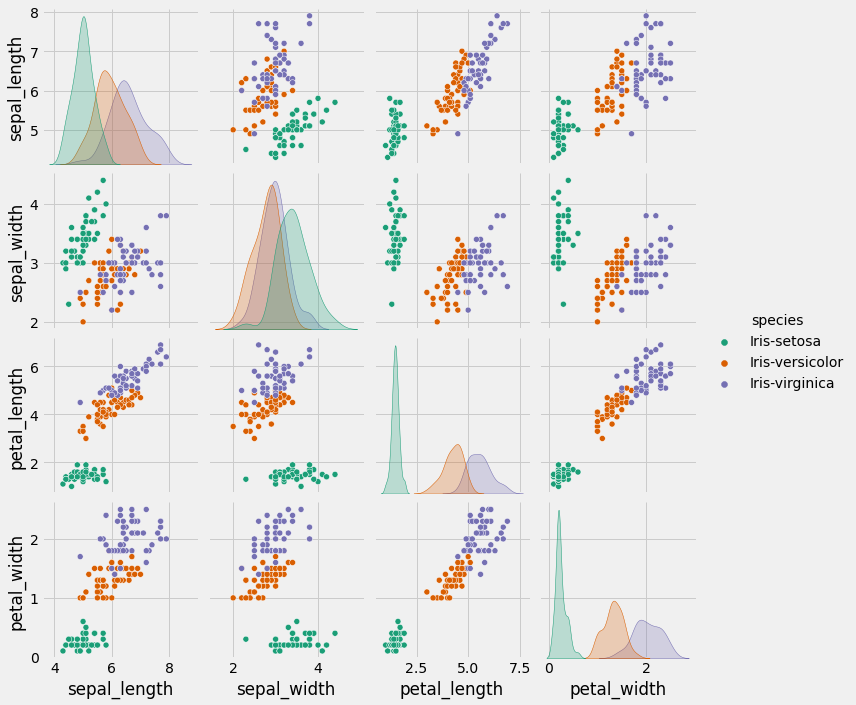

In [ ]:
# Visualizing relationship between features :. 
sns.pairplot(iris,hue='species',palette='Dark2');

 setosa flower can be easily identified by any ML algos!!Because,it's easy to separte from other flowers.

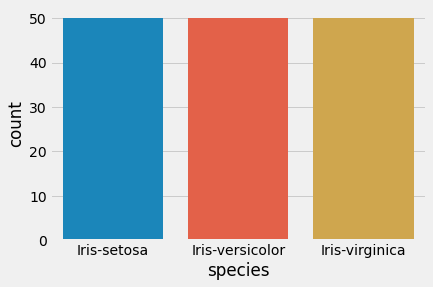

In [ ]:
#Dataset balance checking
sns.countplot(iris.species);

# Data Preprocessing


In [ ]:
#Import required ML models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

#Standard scaler
from sklearn.preprocessing import StandardScaler

**We will use Lda ,dimensionality reduction technique to reduce no of features --LDA is supervised machine learning **

In [ ]:
#Separate X and Y varaibles
X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling
As was the case with PCA, we need to perform feature scaling for LDA too.

In [ ]:
#Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

# Performing LDA

In [ ]:
#Implementing Lda
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

We reduced # of features from 4 to 1..

****Like PCA, we have to pass the value for the **n_components** parameter of the LDA, which refers to the number of linear discriminates that we want to retrieve. In this case we set the** n_components to 1,**** since we first want to check the performance of our classifier with a single linear discriminant. Finally we execute the fit and transform methods to actually retrieve the linear discriminants.****

**Notice, in case of LDA, the transform method takes two parameters: the **X_train** and the **y_train**. However in the case of PCA, the transform method only requires one parameter i.e. X_train. This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants, while PCA doesn't depend upon the output labels.**

In [ ]:
#Lets check our dataset shape
print("Training data shape",X_train_lda.shape)

Training data shape (120, 1)


**We can access the following property to obtain the variance explained by each component.**

In [ ]:
#Explaned variance ratio
lda.explained_variance_ratio_ * 100

array([99.12812885])

### Training and Making Predictions
Since we want to compare the performance of LDA with one linear discriminant to the performance of PCA with one principal component, we will use the same Random Forest classifier that we used to evaluate performance of PCA-reduced algorithms.

In [ ]:
#Random forest classifer
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

### Evaluating the Performance
As always, the last step is to evaluate performance of the algorithm with the help of a confusion matrix and find the accuracy of the prediction. 

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


Accuracy of test data 1.0


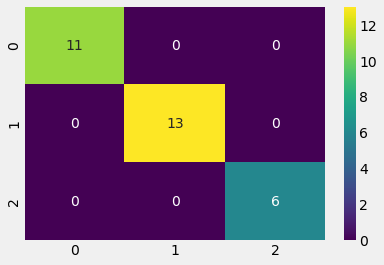

In [ ]:
#Seaborn heatmap for confusion matrix
sns.heatmap(cm,cmap='viridis',annot=True);
print('Accuracy of test data' ,accuracy_score(y_test, y_pred))

In [ ]:
#Classification report
print(f"classification report :")
print("\n")
print(classification_report(y_test, y_pred))

classification report :


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



As we can see, the Random forest classifier correctly classified everything in the test set

***You can see that with one linear discriminant, the algorithm achieved an accuracy of 100%, which is greater than the accuracy achieved with one principal component***

# Performing PCA

*PCA is a technique for feature extraction. So it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all the variables.*

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1).fit(X_train)

#Fitting our model
X_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(X_test)

In [ ]:
#Lets check variance
print(f"Pca explained varaince ratio (n_comp=1) :{pca.explained_variance_ratio_ *100}")

Pca explained varaince ratio (n_comp=1) :[72.22652802]


**Looks like LDA is performing better than PCA!!It's evident that after tranforming variables to one LDA explained 99% of the varaiance !!***

Let's Make predictions with pca performed variables

In [ ]:
#Make a model with RF
clf2 = RandomForestClassifier(max_depth=2,random_state=42)
clf2.fit(X_train,y_train)
pca_pred = clf2.predict(X_test)

### Evaluate Model 

In [ ]:
##Confusion Matrix
cm_pca = confusion_matrix(y_test,pca_pred)
print(cm_pca)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


Accuracy of test data (PCA) 100.0


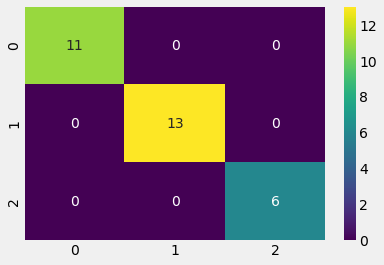

In [ ]:
##Let's visualize our CM
sns.heatmap(cm_pca,cmap='viridis',annot=True);
print('Accuracy of test data (PCA)' ,accuracy_score(y_test, pca_pred)*100)

## PCA vs LDA: What to Choose for Dimensionality Reduction?

In case of uniformly distributed data, LDA almost always performs better than PCA. However if the data is highly skewed (irregularly distributed) then it is advised to use PCA since LDA can be biased towards the majority class.

Finally, it is beneficial that PCA can be applied to labeled as well as unlabeled data since it doesn't rely on the output labels. On the other hand, LDA requires output classes for finding linear discriminants and hence requires labeled data

# PCA Vs LDA Sklearn Example

explained variance ratio (first two components): [0.92461872 0.05306648]


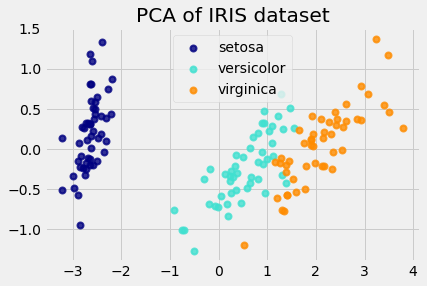

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")
plt.show()

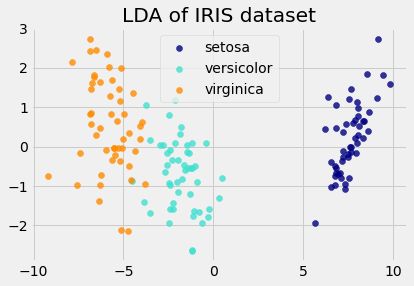

In [ ]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()